In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dem_stitcher.stitcher import stitch_dem
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from pathlib import Path

Parameters for the notebook

In [3]:
dst_area_or_point = 'Point'
dst_ellipsoidal_height = True
dem_name = 'glo_30'
out_directory_name = 'out'

In [4]:
out_directory = Path(out_directory_name)
out_directory.mkdir(exist_ok=True, parents=True)

In [5]:
%%time

# Central coast of California
# xmin, ymin, xmax, ymax
bounds = [-121.5, 34.95, -120.2, 36.25]

X, p = stitch_dem(bounds,
                  dem_name=dem_name,
                  dst_ellipsoidal_height=dst_ellipsoidal_height,
                  dst_area_or_point=dst_area_or_point)

Reading glo_30 Datasets: 100%|█| 5/5 [00:06<00:
/Users/cmarshak/bekaert-team/dem-stitcher/dem_stitcher/rio_window.py:127: UserWarning: Requesting extent beyond raster bounds of [-179.99166666666665, -90.00833256179983, 180.00833333333335, 90.00833256179983]. Shrinking bounds in raster crs to (-121.50013888888888, 34.94986111111111, -120.1998611111111, 36.25013888888889)
  warn(f'Requesting extent beyond raster bounds of {list(src_bounds)}. '


CPU times: user 3.87 s, sys: 1.2 s, total: 5.08 s
Wall time: 34.5 s


Text(0, 0.5, 'Latitude')

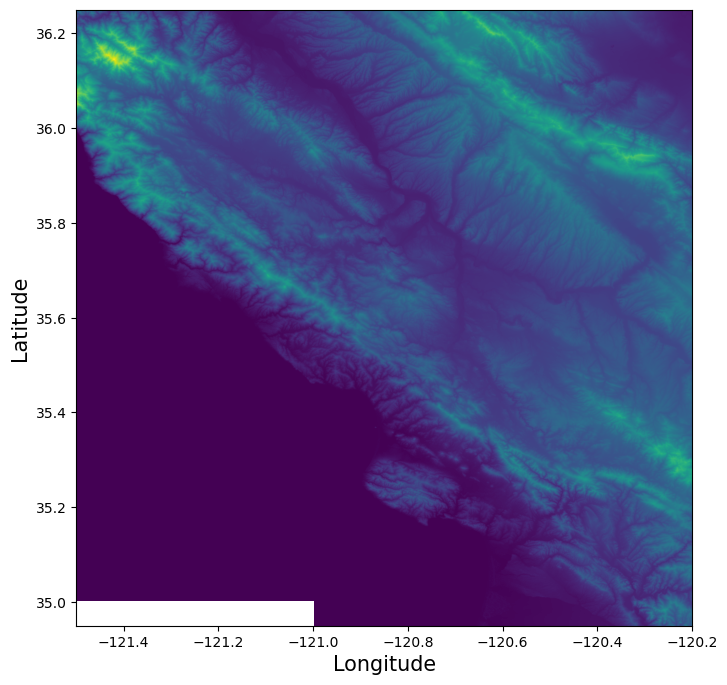

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = plot.show(X, transform=p['transform'], ax=ax)
ax.set_xlabel('Longitude', size=15)
ax.set_ylabel('Latitude', size=15)

Write the file and ensure tags are specified. Uncomment to save the DEM as a GeoTiff file.

In [7]:
height_type = 'ellipsoidal' if dst_ellipsoidal_height else 'geoid'

with rasterio.open(out_directory / f'{dem_name}_{height_type}_{dst_area_or_point}.tif', 'w', **p) as ds:
    ds.write(X, 1)
    ds.update_tags(AREA_OR_POINT=dst_area_or_point) 